# Striplog basics

This notebooks looks at the main `striplog` object. For the basic objects it depends on, see [Basic objects](./Basic_objects.ipynb).

First, import anything we might need.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import striplog
striplog.__version__

# If you get a lot of warnings here, try running this block again.

'0.8.3'

In [2]:
from striplog import Legend, Lexicon, Interval, Component

In [3]:
legend = Legend.builtin('NSDOE')
lexicon = Lexicon.default()

## Making a `striplog`

In [4]:
from striplog import Striplog
print(Striplog.__doc__)


    A Striplog is a sequence of intervals.

    We will build them from LAS files or CSVs.

    Args:
        list_of_Intervals (list): A list of Interval objects.
        source (str): A source for the data. Default None.
        order (str): 'auto', 'depth', 'elevation', or 'none'. Please refer to
            the documentation for details. Best idea is to let the default
            work. Default: 'auto'.
    


Here is one of the images we will convert into striplogs:

<img src="M-MG-70_14.3_135.9.png" width=50 style="float:left" />

In [5]:
imgfile = "M-MG-70_14.3_135.9.png"

In [6]:
strip = Striplog.from_img(imgfile, 14.3, 135.9, legend=legend)
strip

/home/gfa/.local/share/virtualenvs/GSDMA2019-F9ES6BKJ/lib/python3.6/site-packages/striplog/striplog.py:868: UserWarning: from_img() is deprecated; please use from_image()
  warnings.warn(w)


Striplog(26 Intervals, start=14.3, stop=135.9)

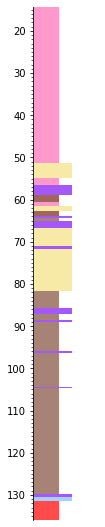

In [8]:
strip.plot(legend, ladder=True, aspect=5)

## Representations of a `striplog`

There are several ways to inspect a striplog:

* **`print`** prints the contents of the striplog
* **`top`** shows us a list of the primary lithologies in the striplog, in order of cumulative thickness
* **`plot`** makes a plot of the striplog with coloured bars

In [9]:
print(strip[:5])

{'top': Position({'middle': 14.3, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 51.24117647058824, 'units': 'm'}), 'base': Position({'middle': 54.81764705882354, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]}
{'top': Position({'middle': 54.81764705882354, 'units': 'm'}), 'base': Position({'middle': 56.55882352941177, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 56.55882352941177, 'units': 'm'}), 'base': Position({'middle': 58.86470588235295, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'dolomite'})]}
{'top': Position({'middle': 58.86470588235295, 'units': 'm'}), 'base': Position({'middle': 60.464705882352945, 'units': 'm'}), 

In [10]:
strip.unique

[(Component({'lithology': 'siltstone', 'colour': 'grey'}), 46.16470588235293),
 (Component({'lithology': 'anhydrite'}), 39.67058823529412),
 (Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'}),
  19.200000000000003),
 (Component({'lithology': 'dolomite'}), 8.282352941176498),
 (Component({'lithology': 'volcanic'}), 4.42352941176469),
 (Component({'lithology': 'siltstone', 'colour': 'red'}), 2.7764705882352843),
 (Component({'lithology': 'limestone'}), 1.082352941176481)]

It's easy enough to visualize this. Perhaps this should be a method...

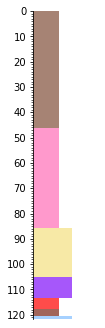

In [10]:
depth = 0
list_of_int = []
for i in strip.unique:
    list_of_int.append(Interval(depth, depth+i[1], components=[i[0]]))
    depth += i[1]

Striplog(list_of_int).plot(legend, aspect=3)

## Plot

If you call `plot()` on a `Striplog` you'll get random colours (one per rock type in the striplog), and preset aspect ratio of 10.  

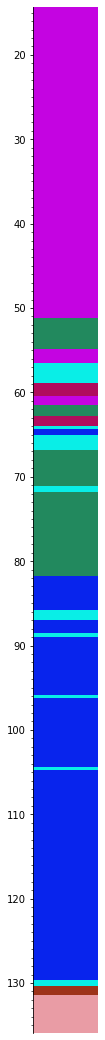

In [11]:
strip.plot()

For more control, you can pass some parameters. You'll probably always want to pass a legend. 

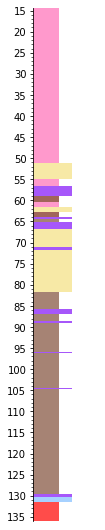

In [12]:
strip.plot(legend, ladder=True, aspect=5, ticks=5)

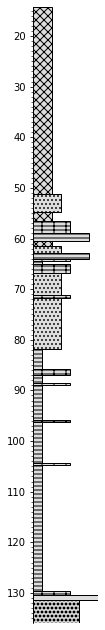

In [13]:
hashy_csv = """colour,width,hatch,component colour,component grainsize,component lithology
#dddddd,1,---,grey,,siltstone,
#dddddd,2,xxx,,,anhydrite,
#dddddd,3,...,grey,vf-f,sandstone,
#dddddd,4,+--,,,dolomite,
#dddddd,5,ooo,,,volcanic,
#dddddd,6,---,red,,siltstone,
#dddddd,7,,,,limestone,
"""
hashy = Legend.from_csv(text=hashy_csv)
strip.plot(hashy, ladder=True, aspect=6, lw=1)

## Manipulating a `striplog`

Again, the object is indexable and iterable.

In [14]:
print(strip[:3])

{'top': Position({'middle': 14.3, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 51.24117647058824, 'units': 'm'}), 'base': Position({'middle': 54.81764705882354, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]}
{'top': Position({'middle': 54.81764705882354, 'units': 'm'}), 'base': Position({'middle': 56.55882352941177, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}


In [15]:
print(strip[-1].primary.summary())

Volcanic


In [16]:
for i in strip[:5]:
    print(i.summary())

36.94 m of anhydrite
3.58 m of sandstone, grey, vf-f
1.74 m of anhydrite
2.31 m of dolomite
1.60 m of siltstone, red


In [17]:
len(strip)

26

In [18]:
import numpy as np
np.array([d.top.z for d in strip[5:13]])

array([60.46470588, 61.45294118, 62.77058824, 63.94705882, 64.37058824,
       65.07647059, 66.77058824, 71.1       ])

You can even index into it with an iterable, like a list of indices. The result is a striplog.

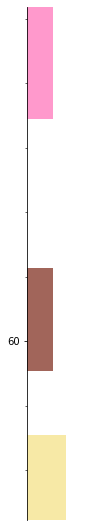

In [19]:
indices = [2,4,6]
strip[indices].plot(legend, aspect=5)

## Slicing and indexing

Slicing returns a new `striplog`:

In [20]:
strip[1:3]

Striplog(2 Intervals, start=51.24117647058824, stop=56.55882352941177)

In [21]:
rock = strip.find('sandstone')[1].components[0]
rock2 = Component({'lithology':'shale', 'colour':'grey'})
iv = Interval(top=300, base=350, description='', components=[rock, rock2])

In [22]:
strip[-3:-1] + Striplog([iv])

Striplog(3 Intervals, start=129.68823529411765, stop=350.0)

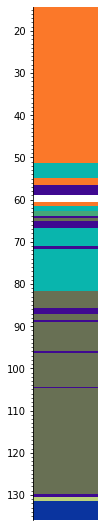

In [23]:
del strip[4]

strip.plot(aspect=5)

## Read or write CSV or LAS3

In [24]:
print(strip.to_las3())

~Lithology_Parameter
LITH .   Striplog         : Lithology source          {S}
LITHD.   MD               : Lithology depth reference {S}

~Lithology_Definition
LITHT.M                   : Lithology top depth       {F}
LITHB.M                   : Lithology base depth      {F}
LITHD.                    : Lithology description     {S}

~Lithology_Data | Lithology_Definition
14.3,51.24117647058824,Anhydrite
51.24117647058824,54.81764705882354,"Sandstone, grey, vf-f"
54.81764705882354,56.55882352941177,Anhydrite
56.55882352941177,58.86470588235295,Dolomite
60.464705882352945,61.45294117647059,Anhydrite
61.45294117647059,62.77058823529413,"Sandstone, grey, vf-f"
62.77058823529413,63.94705882352942,"Siltstone, red"
63.94705882352942,64.37058823529412,Dolomite
64.37058823529412,65.0764705882353,"Siltstone, grey"
65.0764705882353,66.77058823529413,Dolomite
66.77058823529413,71.10000000000001,"Sandstone, grey, vf-f"
71.10000000000001,71.80588235294118,Dolomite
71.80588235294118,81.78235294117647

In [25]:
strip.source

'Image'

In [26]:
csv_string = """top, base, lithology
  200.000,  230.329,  Anhydrite                                       
  230.329,  233.269,  Grey vf-f sandstone                             
  233.269,  234.700,  Anhydrite                                       
  234.700,  236.596,  Dolomite                                        
  236.596,  237.911,  Red siltstone                                   
  237.911,  238.723,  Anhydrite                                       
  238.723,  239.807,  Grey vf-f sandstone                             
  239.807,  240.774,  Red siltstone                                   
  240.774,  241.122,  Dolomite                                        
  241.122,  241.702,  Grey siltstone                                  
  241.702,  243.095,  Dolomite                                        
  243.095,  246.654,  Grey vf-f sandstone                             
  246.654,  247.234,  Dolomite                                        
  247.234,  255.435,  Grey vf-f sandstone                             
  255.435,  258.723,  Grey siltstone                                  
  258.723,  259.729,  Dolomite                                        
  259.729,  260.967,  Grey siltstone                                  
  260.967,  261.354,  Dolomite                                        
  261.354,  267.041,  Grey siltstone                                  
  267.041,  267.350,  Dolomite                                        
  267.350,  274.004,  Grey siltstone                                  
  274.004,  274.313,  Dolomite                                        
  274.313,  294.816,  Grey siltstone                                  
  294.816,  295.397,  Dolomite                                        
  295.397,  296.286,  Limestone                                       
  296.286,  300.000,  Volcanic                                        
"""

In [27]:
strip2 = Striplog.from_csv(text=csv_string, lexicon=lexicon)

In [32]:
strip2

Striplog(26 Intervals, start=200.0, stop=300.0)

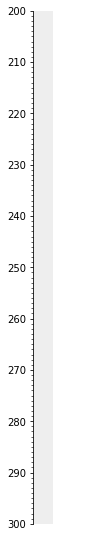

In [34]:
strip2.plot(legend, ladder=True, aspect=5)

### With Striplog.from_csv the information is stored in "data" instead of Components
 * $strip2 (csv)$  {'top': Position({'middle': 200.0, 'units': 'm'}), 'base': Position({'middle': 230.329, 'units': 'm'}), 'description': '', 'data': {'lithology': 'Anhydrite'}, 'components': []}
 * $strip image$ {'top': Position({'middle': 14.3, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}

In [128]:
print(strip) 

{'top': Position({'middle': 14.3, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 51.24117647058824, 'units': 'm'}), 'base': Position({'middle': 54.81764705882354, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]}
{'top': Position({'middle': 54.81764705882354, 'units': 'm'}), 'base': Position({'middle': 56.55882352941177, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 56.55882352941177, 'units': 'm'}), 'base': Position({'middle': 58.86470588235295, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'dolomite'})]}
{'top': Position({'middle': 60.464705882352945, 'units': 'm'}), 'base': Position({'middle': 61.45294117647059, 'units': 'm'}), 

In [129]:
s=strip[0]

In [134]:
s.components=[striplog.Component({'lithology': 'dolomite', 'colour': 'grey'})]

In [135]:
s

Interval({'top': Position({'middle': 14.3, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'dolomite', 'colour': 'grey'})]})

In [130]:
from striplog import Position
from striplog import description
from striplog import Component
from striplog import Interval


In [62]:
#params = {'upper': 95,
 #         'middle': 100,
  #        'lower': 110,
   #       'meta': {'kind': 'erosive', 'source': 'DOE'}
    #      }

#p = Position(**params)
#p
Position
description
Component

striplog.component.Component

## Striplog = list of Intervals

### Init signature:
 Interval(
    top,
    base=None,
    description='',
    lexicon=None,
    data=None,
    components=None,
    max_component=1,
    abbreviations=False,
)

In [54]:
? Striplog

In [105]:
st0 = strip2[0]

In [107]:
strip2[1]


AttributeError: 'str' object has no attribute 'summary'

Interval({'top': Position({'middle': 230.329, 'units': 'm'}), 'base': Position({'middle': 233.269, 'units': 'm'}), 'description': '', 'data': {'lithology': 'Grey vf-f sandstone'}, 'components': Component({'lithology': 'Grey vf-f sandstone'})})

In [110]:
? Component

In [68]:
st0.top

upper,200.0
middle,200.0
lower,200.0


In [69]:
st0.components

[]

In [78]:
for i in strip2:
    (i.components) = (i.data)

In [112]:
? Striplog.from_csv

##  iterate through dic

In [91]:
s0 = strip[0]

In [109]:
st0

AttributeError: 'str' object has no attribute 'summary'

Interval({'top': Position({'middle': 200.0, 'units': 'm'}), 'base': Position({'middle': 230.329, 'units': 'm'}), 'description': '', 'data': {'lithology': 'Anhydrite'}, 'components': Component({'lithology': 'Anhydrite'})})

In [100]:
strip2

Striplog(26 Intervals, start=200.0, stop=300.0)

In [102]:
? Interval

In [94]:
s0

Interval({'top': Position({'middle': 14.3, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]})

In [92]:
s0.components.items()

AttributeError: 'list' object has no attribute 'items'

In [93]:
strip.components

[Component({'lithology': 'siltstone', 'colour': 'grey'}),
 Component({'lithology': 'anhydrite'}),
 Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'}),
 Component({'lithology': 'dolomite'}),
 Component({'lithology': 'volcanic'}),
 Component({'lithology': 'siltstone', 'colour': 'red'}),
 Component({'lithology': 'limestone'})]

In [115]:
Component.from_text('Grey vf-f sandstone', lexicon)

lithology,sandstone
grainsize,vf-f
colour,grey


In [80]:
? Component

In [79]:
for i in strip2:
    print(i.components)

{'lithology': 'Anhydrite'}
{'lithology': 'Grey vf-f sandstone'}
{'lithology': 'Anhydrite'}
{'lithology': 'Dolomite'}
{'lithology': 'Red siltstone'}
{'lithology': 'Anhydrite'}
{'lithology': 'Grey vf-f sandstone'}
{'lithology': 'Red siltstone'}
{'lithology': 'Dolomite'}
{'lithology': 'Grey siltstone'}
{'lithology': 'Dolomite'}
{'lithology': 'Grey vf-f sandstone'}
{'lithology': 'Dolomite'}
{'lithology': 'Grey vf-f sandstone'}
{'lithology': 'Grey siltstone'}
{'lithology': 'Dolomite'}
{'lithology': 'Grey siltstone'}
{'lithology': 'Dolomite'}
{'lithology': 'Grey siltstone'}
{'lithology': 'Dolomite'}
{'lithology': 'Grey siltstone'}
{'lithology': 'Dolomite'}
{'lithology': 'Grey siltstone'}
{'lithology': 'Dolomite'}
{'lithology': 'Limestone'}
{'lithology': 'Volcanic'}


In [77]:
for i in strip:
    print(i.components)

[Component({'lithology': 'anhydrite'})]
[Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]
[Component({'lithology': 'anhydrite'})]
[Component({'lithology': 'dolomite'})]
[Component({'lithology': 'anhydrite'})]
[Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]
[Component({'lithology': 'siltstone', 'colour': 'red'})]
[Component({'lithology': 'dolomite'})]
[Component({'lithology': 'siltstone', 'colour': 'grey'})]
[Component({'lithology': 'dolomite'})]
[Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]
[Component({'lithology': 'dolomite'})]
[Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]
[Component({'lithology': 'siltstone', 'colour': 'grey'})]
[Component({'lithology': 'dolomite'})]
[Component({'lithology': 'siltstone', 'colour': 'grey'})]
[Component({'lithology': 'dolomite'})]
[Component({'lithology': 'siltstone', 'colour': 'grey'})]
[Component({'lithology': 'dolomite'})]
[C

KeyError: 0

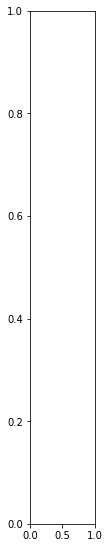

In [76]:
strip2.plot(legend, ladder=True, aspect=5)

In [36]:
print(strip)

{'top': Position({'middle': 14.3, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 51.24117647058824, 'units': 'm'}), 'base': Position({'middle': 54.81764705882354, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]}
{'top': Position({'middle': 54.81764705882354, 'units': 'm'}), 'base': Position({'middle': 56.55882352941177, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 56.55882352941177, 'units': 'm'}), 'base': Position({'middle': 58.86470588235295, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'dolomite'})]}
{'top': Position({'middle': 60.464705882352945, 'units': 'm'}), 'base': Position({'middle': 61.45294117647059, 'units': 'm'}), 

Notice the warning about a missing term in the lexicon.

In [28]:
Component.from_text('Grey vf-f sandstone', lexicon)

lithology,sandstone
grainsize,vf-f
colour,grey


In [30]:
las3 = """~Lithology_Parameter
LITH .                    : Lithology source          {S}
LITHD.   MD               : Lithology depth reference {S}

~Lithology_Definition
LITHT.M                   : Lithology top depth       {F}
LITHB.M                   : Lithology base depth      {F}
LITHN.                    : Lithology name            {S}

~Lithology_Data | Lithology_Definition
  200.000,  230.329,  Anhydrite                                       
  230.329,  233.269,  Grey vf-f sandstone                             
  233.269,  234.700,  Anhydrite                                       
  234.700,  236.596,  Dolomite                                        
  236.596,  237.911,  Red siltstone                                   
  237.911,  238.723,  Anhydrite                                       
  238.723,  239.807,  Grey vf-f sandstone                             
  239.807,  240.774,  Red siltstone                                   
  240.774,  241.122,  Dolomite                                        
  241.122,  241.702,  Grey siltstone                                  
  241.702,  243.095,  Dolomite                                        
  243.095,  246.654,  Grey vf-f sandstone                             
  246.654,  247.234,  Dolomite                                        
  247.234,  255.435,  Grey vf-f sandstone                             
  255.435,  258.723,  Grey siltstone                                  
  258.723,  259.729,  Dolomite                                        
  259.729,  260.967,  Grey siltstone                                  
  260.967,  261.354,  Dolomite                                        
  261.354,  267.041,  Grey siltstone                                  
  267.041,  267.350,  Dolomite                                        
  267.350,  274.004,  Grey siltstone                                  
  274.004,  274.313,  Dolomite                                        
  274.313,  294.816,  Grey siltstone                                  
  294.816,  295.397,  Dolomite                                        
  295.397,  296.286,  Limestone                                       
  296.286,  300.000,  Volcanic                                        
"""

In [116]:
strip3 = Striplog.from_las3(las3, lexicon)
print(strip3)

{'top': Position({'middle': 200.0, 'units': 'm'}), 'base': Position({'middle': 230.329, 'units': 'm'}), 'description': 'Anhydrite', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 230.329, 'units': 'm'}), 'base': Position({'middle': 233.269, 'units': 'm'}), 'description': 'Grey vf-f sandstone', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'grey'})]}
{'top': Position({'middle': 233.269, 'units': 'm'}), 'base': Position({'middle': 234.7, 'units': 'm'}), 'description': 'Anhydrite', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 234.7, 'units': 'm'}), 'base': Position({'middle': 236.596, 'units': 'm'}), 'description': 'Dolomite', 'data': {}, 'components': [Component({'lithology': 'dolomite'})]}
{'top': Position({'middle': 236.596, 'units': 'm'}), 'base': Position({'middle': 237.911, 'units': 'm'}), 'description': 'Red siltstone', 'data': {}, 'comp

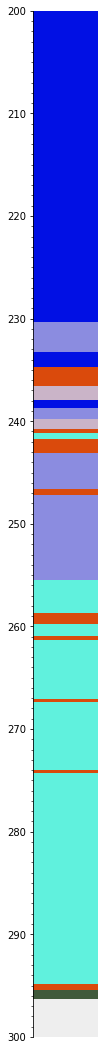

In [118]:
strip3.plot()

### Other .las

In [119]:
? Striplog.from_las3

In [120]:
strip4 = Striplog.from_las3("P-129_out.LAS", lexicon)


AttributeError: 'NoneType' object has no attribute 'group'

<hr />

<p style="color:gray">©2015 Agile Geoscience. Licensed CC-BY. <a href="https://github.com/agile-geoscience/striplog">striplog.py</a></p>